In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import sklearn 


In [3]:

### nh·∫≠p data v√† in ra k·∫øt qu·∫£qu·∫£

In [4]:
SaleFact = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='SalesFact')
Geography = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='Geography')
Product = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='Product')
print(SaleFact.head())
print(Geography.head())
print(Product.head())

   ProductID       Date    Zip  Units    Revenue          COGS
0       1228 2013-07-31  78773     12   19648.44  12309.747660
1        781 2014-03-12  90501     16   20351.52  13497.128064
2       2090 2013-11-29  44460     26  111367.62  91488.499830
3       1116 2018-08-29  30122     12   36280.44  21967.806420
4        993 2013-04-27  75789     14   55557.18  48645.866808
     Zip            City State Region      District
0  15201  Pittsburgh, PA    PA   East  District #13
1  15202  Pittsburgh, PA    PA   East  District #13
2  15203  Pittsburgh, PA    PA   East  District #13
3  15204  Pittsburgh, PA    PA   East  District #13
4  15205  Pittsburgh, PA    PA   East  District #13
  Category      Segment        Product  ProductID
0    Urban  Convenience  Maximus UC-01        536
1    Urban  Convenience  Maximus UC-02        537
2    Urban  Convenience  Maximus UC-03        538
3    Urban  Convenience  Maximus UC-04        539
4    Urban  Convenience  Maximus UC-05        540


In [5]:
### L√†m s·∫°ch d·ªØ li·ªáu v√† chu·∫©n h√≥a ƒë·ªÉ traintrain

In [6]:
SaleFact['Date'] = pd.to_datetime(SaleFact['Date'])
SaleFact['Revenue'] = SaleFact['Revenue'].replace('[\$,]', '', regex=True).astype(float)
SaleFact['COGS'] = SaleFact['COGS'].replace('[\$,]', '', regex=True).astype(float)
SaleFact['Year'] = SaleFact['Date'].dt.year
SaleFact['Month'] = SaleFact['Date'].dt.month
SaleFact['year_month'] = SaleFact['Date'].dt.strftime('%Y-%m')
SaleFact['year_month'] = SaleFact['Date'].dt.to_period('M')
SaleFact['Quarter'] = SaleFact['Date'].dt.quarter
SaleFact = SaleFact.dropna(subset=['Revenue'])  
SaleFact = SaleFact[~SaleFact['Revenue'].isin([float('inf'), float('-inf')])]  
Product = Product.drop_duplicates(subset=['ProductID'])
Geography = Geography.drop_duplicates(subset=['Zip'])
print(SaleFact.head())
print(Product.head())
print(Geography.head())

   ProductID       Date    Zip  Units    Revenue          COGS  Year  Month  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660  2013      7   
1        781 2014-03-12  90501     16   20351.52  13497.128064  2014      3   
2       2090 2013-11-29  44460     26  111367.62  91488.499830  2013     11   
3       1116 2018-08-29  30122     12   36280.44  21967.806420  2018      8   
4        993 2013-04-27  75789     14   55557.18  48645.866808  2013      4   

  year_month  Quarter  
0    2013-07        3  
1    2014-03        1  
2    2013-11        4  
3    2018-08        3  
4    2013-04        2  
  Category      Segment        Product  ProductID
0    Urban  Convenience  Maximus UC-01        536
1    Urban  Convenience  Maximus UC-02        537
2    Urban  Convenience  Maximus UC-03        538
3    Urban  Convenience  Maximus UC-04        539
4    Urban  Convenience  Maximus UC-05        540
     Zip            City State Region      District
0  15201  Pittsburgh, PA    P

In [7]:
print(SaleFact.shape)       # S·ªë d√≤ng, s·ªë c·ªôt
print(SaleFact.dtypes)      # Ki·ªÉu d·ªØ li·ªáu c·ªßa t·ª´ng c·ªôt
print(SaleFact.head())      # Xem tr∆∞·ªõc v√†i d√≤ng d·ªØ li·ªáu
print(SaleFact.isnull().sum())  # Ki·ªÉm tra d·ªØ li·ªáu b·ªã thi·∫øu

(976202, 10)
ProductID              int64
Date          datetime64[ns]
Zip                    int64
Units                  int64
Revenue              float64
COGS                 float64
Year                   int32
Month                  int32
year_month         period[M]
Quarter                int32
dtype: object
   ProductID       Date    Zip  Units    Revenue          COGS  Year  Month  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660  2013      7   
1        781 2014-03-12  90501     16   20351.52  13497.128064  2014      3   
2       2090 2013-11-29  44460     26  111367.62  91488.499830  2013     11   
3       1116 2018-08-29  30122     12   36280.44  21967.806420  2018      8   
4        993 2013-04-27  75789     14   55557.18  48645.866808  2013      4   

  year_month  Quarter  
0    2013-07        3  
1    2014-03        1  
2    2013-11        4  
3    2018-08        3  
4    2013-04        2  
ProductID     0
Date          0
Zip           0
Units         0


In [8]:
## Th·ªëng k√™ gi√° tr·ªã c·ªßa c·ªôt Revenue v√† s·ª≠ d·ª•ng Boxplot ƒë·ªÉ ki·ªÉm tra gi√° tr·ªã ngo·∫°i lai

count    976202.000000
mean       5837.443431
std        4659.683857
min         427.770000
25%        2141.370000
50%        4724.370000
75%        8564.850000
max      334548.900000
Name: Revenue, dtype: float64


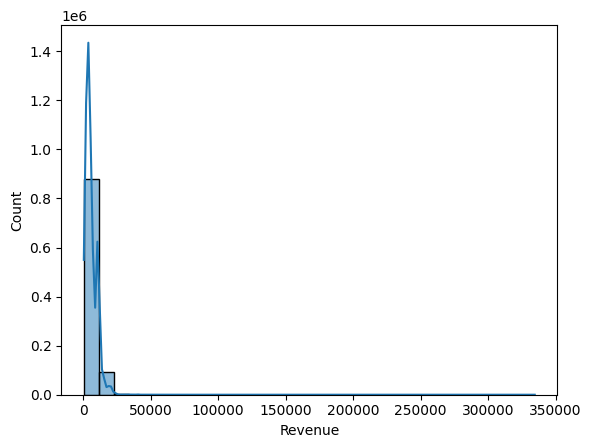

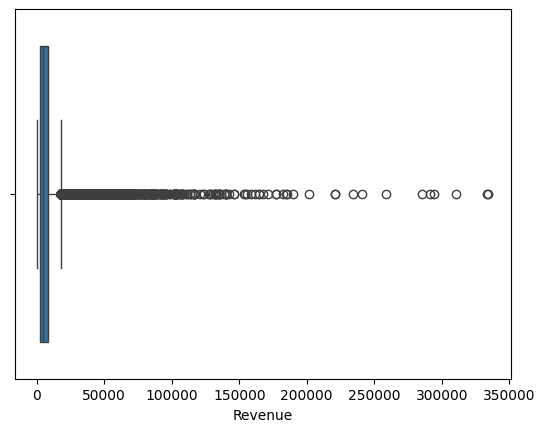

In [9]:
print(SaleFact['Revenue'].describe())  # Th·ªëng k√™ c∆° b·∫£n c·ªßa c·ªôt Revenue
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(SaleFact['Revenue'], bins=30, kde=True)  # Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi
plt.show()
sns.boxplot(x=SaleFact['Revenue'])  # Boxplot ki·ªÉm tra gi√° tr·ªã ngo·∫°i lai
plt.show()

In [10]:
## Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán bi·∫øn ƒë·ªông doanh thu theo nƒÉm

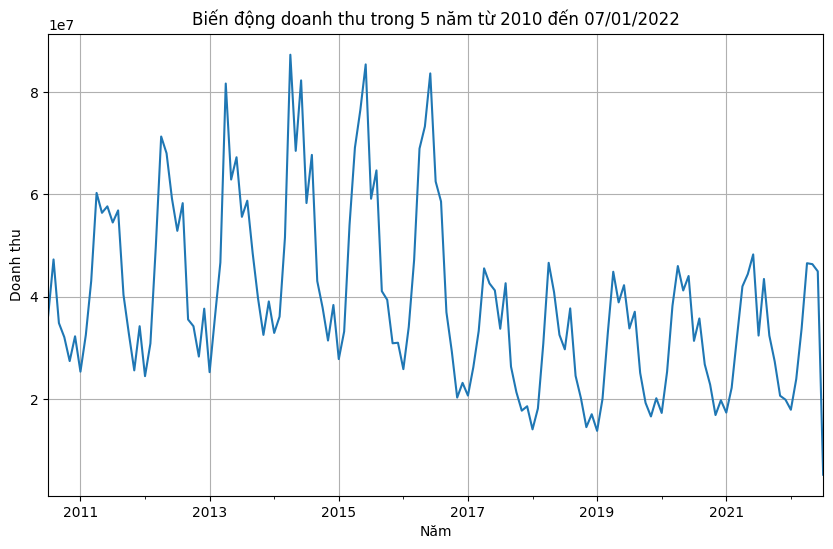

In [11]:

revenue_by_year_month = SaleFact.groupby(['year_month'])['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_year_month.plot(kind='line',marker='')
plt.title('Bi·∫øn ƒë·ªông doanh thu trong 5 nƒÉm t·ª´ 2010 ƒë·∫øn 07/01/2022')
plt.xlabel('NƒÉm')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [12]:
# Bi·ªÉu ƒë·ªì xu h∆∞·ªõng doanh thu theo th√°ng

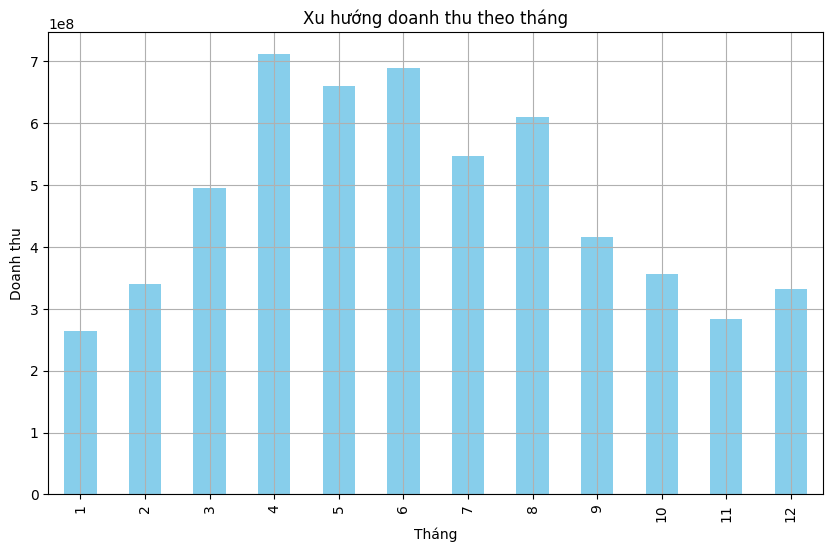

In [13]:
revenue_by_month = SaleFact.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar', color='skyblue')
plt.title('Xu h∆∞·ªõng doanh thu theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [14]:
## Bi·ªÉu ƒë·ªì ƒë√°nh gi√° t·ªïng doanh thu theo qu√Ω 

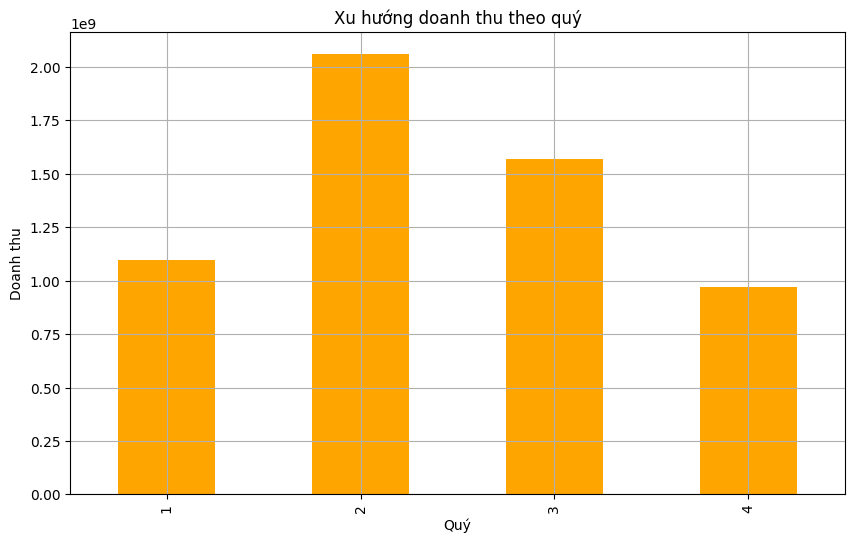

In [15]:
revenue_by_quarter = SaleFact.groupby('Quarter')['Revenue'].sum()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
revenue_by_quarter.plot(kind='bar', color='orange')
plt.title('Xu h∆∞·ªõng doanh thu theo qu√Ω')
plt.xlabel('Qu√Ω')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [16]:
## Bi·ªÉu ƒë·ªì xu h∆∞·ªõng s·ªë l∆∞·ª£ng s·∫£n ph·∫©m b√°n qua th·ªùi gian

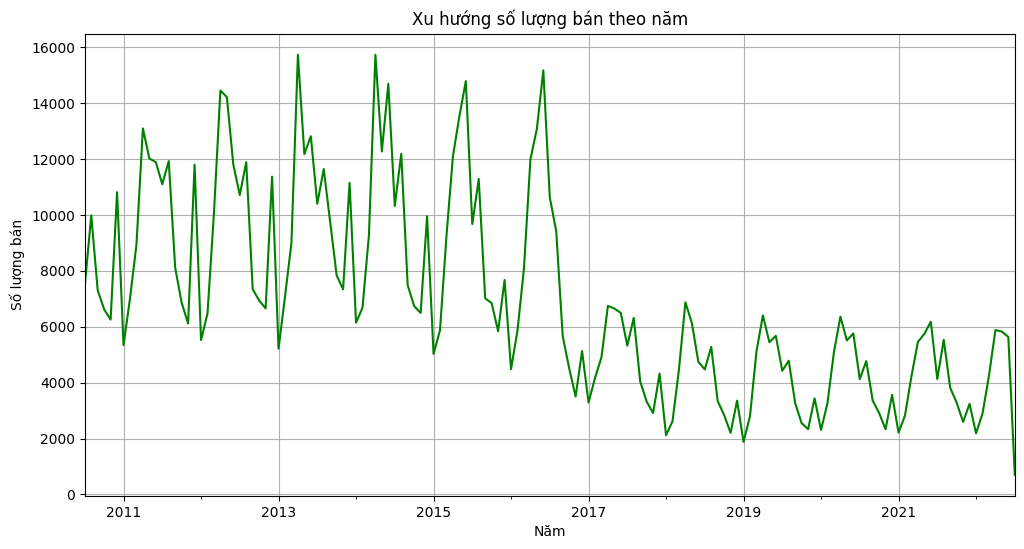

In [17]:

units_by_year = SaleFact.groupby('year_month')['Units'].sum()
plt.figure(figsize=(12, 6))
units_by_year.plot(kind='line', marker='', color='green')
plt.title('Xu h∆∞·ªõng s·ªë l∆∞·ª£ng b√°n theo nƒÉm')
plt.xlabel('NƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng b√°n')
plt.grid(True)
plt.show()

In [18]:
## Bi·ªÉu ƒë·ªì doanh thu theo khu v·ª±c 

     Zip            City State Region      District  ProductID       Date  \
0  15201  Pittsburgh, PA    PA   East  District #13      604.0 2013-07-17   
1  15201  Pittsburgh, PA    PA   East  District #13      475.0 2010-07-27   
2  15201  Pittsburgh, PA    PA   East  District #13      396.0 2012-11-12   
3  15201  Pittsburgh, PA    PA   East  District #13      449.0 2020-07-04   
4  15201  Pittsburgh, PA    PA   East  District #13     2045.0 2015-04-24   

   Units   Revenue          COGS    Year  Month year_month  Quarter  
0    1.0   5981.85   4038.346935  2013.0    7.0    2013-07      3.0  
1    1.0  12448.80   9915.469200  2010.0    7.0    2010-07      3.0  
2    1.0  10927.35   9998.525250  2012.0   11.0    2012-11      4.0  
3    1.0  12284.37  10995.739587  2020.0    7.0    2020-07      3.0  
4    1.0   5606.37   3016.227060  2015.0    4.0    2015-04      2.0  


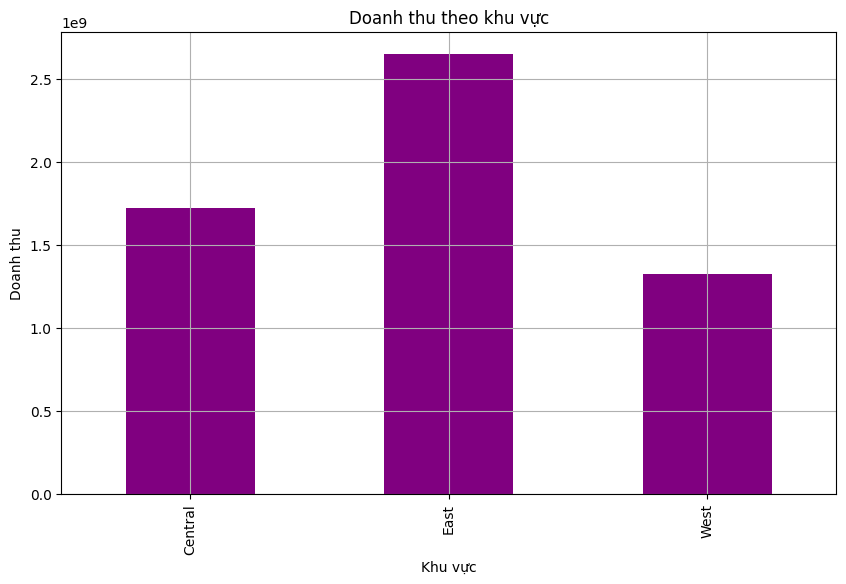

In [19]:
SaleFact_Geo = Geography.merge(SaleFact, how= "left",on="Zip")
print(SaleFact_Geo.head())
revenue_by_region = SaleFact_Geo.groupby('Region')['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='purple')
plt.title('Doanh thu theo khu v·ª±c')
plt.xlabel('Khu v·ª±c')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [20]:
## Bi·ªÉu ƒë·ªì doanh thu theo d√≤ng s·∫£n ph·∫©m
### Trong data, v√¨ s·ªë l∆∞·ª£ng c·ª• th·ªÉ c·ªßa c√°c s·∫£n ph·∫©m r·∫•t l·ªõn n√™n nh√≥m ch√∫ng em ƒë√£ ch·ªâ l·∫•y t·ª´ ƒë·∫ßu c·ªßa c√°c d√≤ng s·∫£n ph·∫©m ƒë·ªÉ l√†m bi·ªÉu ƒë·ªì

       Category       Segment        Product  ProductID       Date      Zip  \
0         Urban   Convenience  Maximus UC-01        536 2013-02-19  98424.0   
1         Urban   Convenience  Maximus UC-01        536 2013-02-22  62002.0   
2         Urban   Convenience  Maximus UC-01        536 2013-04-26  84310.0   
3         Urban   Convenience  Maximus UC-01        536 2013-04-10  35603.0   
4         Urban   Convenience  Maximus UC-01        536 2013-06-10  21655.0   
...         ...           ...            ...        ...        ...      ...   
976853      Mix  Productivity   Quibus MP-32       1264 2020-06-30  90260.0   
976854      Mix  Productivity   Quibus MP-32       1264 2020-02-24   2717.0   
976855      Mix  Productivity   Quibus MP-32       1264 2022-05-24  45638.0   
976856      Mix  Productivity   Quibus MP-32       1264 2020-03-17  92886.0   
976857      Mix  Productivity   Quibus MP-32       1264 2020-01-09  94038.0   

        Units   Revenue          COGS    Year  Mont

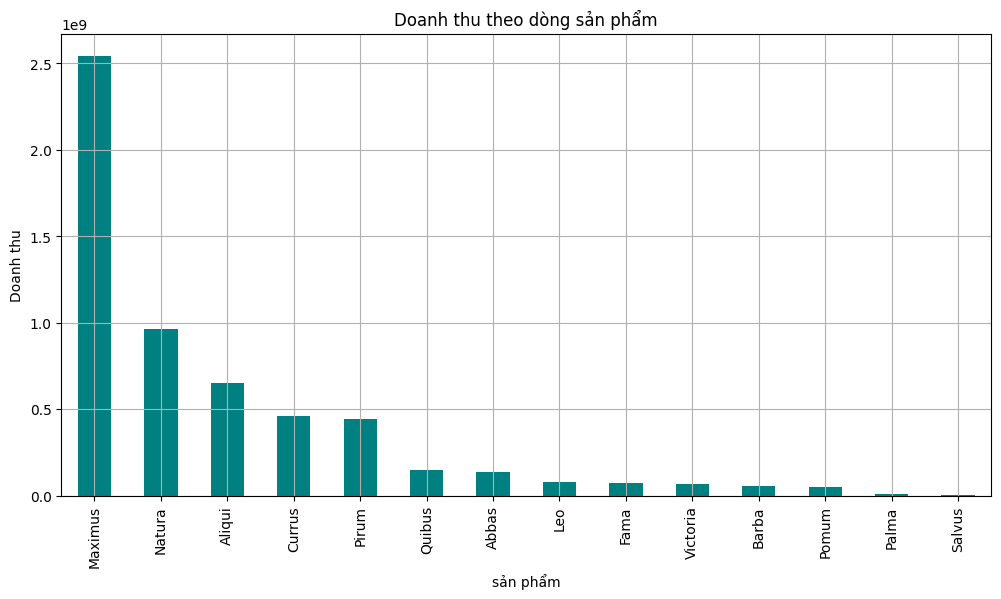

In [21]:
SaleFact_Product = Product.merge(SaleFact, how='left',on="ProductID")
print(SaleFact_Product)
SaleFact_Product['Partition'] = SaleFact_Product['Product'].str.extract(r'^(\w+)')
revenue_by_product = SaleFact_Product.groupby('Partition')['Revenue'].sum()
plt.figure(figsize=(12, 6))
revenue_by_product.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Doanh thu theo d√≤ng s·∫£n ph·∫©m')
plt.xlabel('s·∫£n ph·∫©m')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [22]:
## H√†m t√≠nh to√°n ch·ªâ s·ªë diff
### Tuy ƒë·ªÅ b√†i ƒë√£ ƒë·ªÅ c·∫≠p s·ª≠ d·ª•ng ph∆∞∆°ng sai b·∫≠c 1 nh∆∞ng do s∆° su·∫•t, d·ªØ li·ªáu ƒë√£ kh√¥ng d·ª´ng n√™n ch√∫ng em t·∫°o m·ªôt h√†m ƒë·ªÉ t√≠nh to√°n ph∆∞∆°ng sai 1 c√°ch ch√≠nh x√°c 

In [23]:

def adfuller_test(series, name=""):
    result = adfuller(series, autolag='AIC')
    labels = ["ADF Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]
    output = dict(zip(labels, result[:4]))
    print(f"\n Ki·ªÉm tra t√≠nh d·ª´ng c·ªßa {name if name else 'chu·ªói d·ªØ li·ªáu'}:")
    for key, value in output.items():
        print(f"üîπ {key}: {value:.6f}")
    if result[1] <= 0.05:
        print(" D·ªØ li·ªáu ƒë√£ d·ª´ng (Reject Ho)")
        return True
    else:
        print(" D·ªØ li·ªáu kh√¥ng d·ª´ng (Fail to Reject Ho)")
        return False
def make_stationary(series, max_d=3):
    diff_level = 0
    temp_series = series.copy()
    
    while diff_level < max_d:
        if adfuller_test(temp_series, name=f"D·ªØ li·ªáu sau sai ph√¢n b·∫≠c {diff_level}"):
            break
        temp_series = temp_series.diff().dropna()
        diff_level += 1
    return temp_series, diff_level

In [24]:
## V·∫Ω s∆° ƒë·ªì s·ª± kh√°c nhau gi·ªØa d·ªØ li·ªáu g·ªëc v√† d·ªØ li·ªáu sau khi ph√¢n b·ªë b·∫≠c diff_used


 Ki·ªÉm tra t√≠nh d·ª´ng c·ªßa D·ªØ li·ªáu sau sai ph√¢n b·∫≠c 0:
üîπ ADF Test Statistic: -0.440097
üîπ p-value: 0.903186
üîπ #Lags Used: 12.000000
üîπ Number of Observations Used: 132.000000
 D·ªØ li·ªáu kh√¥ng d·ª´ng (Fail to Reject Ho)

 Ki·ªÉm tra t√≠nh d·ª´ng c·ªßa D·ªØ li·ªáu sau sai ph√¢n b·∫≠c 1:
üîπ ADF Test Statistic: -4.000802
üîπ p-value: 0.001406
üîπ #Lags Used: 11.000000
üîπ Number of Observations Used: 132.000000
 D·ªØ li·ªáu ƒë√£ d·ª´ng (Reject Ho)
S·ªë b·∫≠c sai ph√¢n ƒë√£ s·ª≠ d·ª•ng: 1


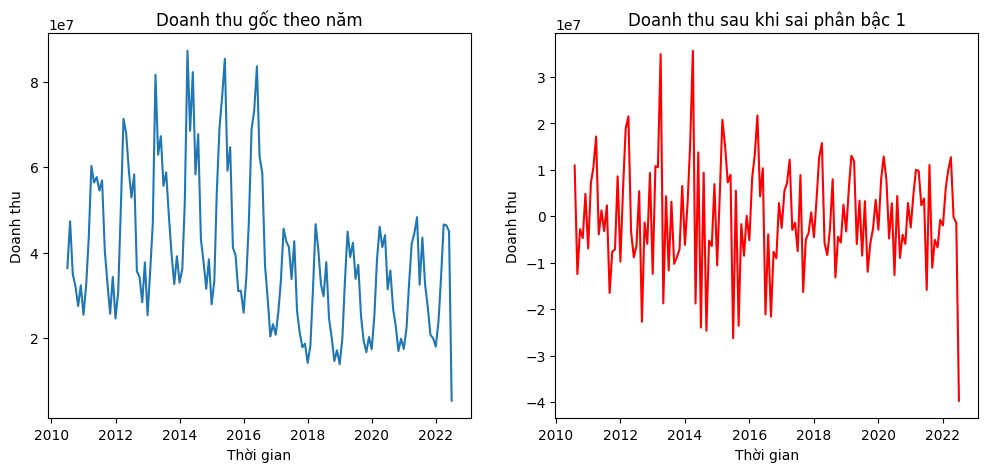

In [25]:

SaleFact['year_month'] = SaleFact['year_month'].dt.to_timestamp()
sampled_data = SaleFact.groupby('year_month')['Revenue'].sum()

if isinstance(sampled_data.index, pd.PeriodIndex):
    sampled_data.index = sampled_data.index.to_timestamp()

stationary_data, diff_used = make_stationary(sampled_data)

if isinstance(stationary_data.index, pd.PeriodIndex):
    stationary_data.index = stationary_data.index.to_timestamp()

plt.figure(figsize=(12, 5))
print(f"S·ªë b·∫≠c sai ph√¢n ƒë√£ s·ª≠ d·ª•ng: {diff_used}")

# Bi·ªÉu ƒë·ªì doanh thu g·ªëc
plt.subplot(1, 2, 1)
plt.plot(sampled_data.index, sampled_data.values, marker='', linestyle='-')
plt.title("Doanh thu g·ªëc theo nƒÉm")
plt.xlabel("Th·ªùi gian")
plt.ylabel("Doanh thu")

# Bi·ªÉu ƒë·ªì doanh thu sau khi sai ph√¢n
plt.subplot(1, 2, 2)
plt.plot(stationary_data.index, stationary_data.values, marker='', linestyle='-', color='red')
plt.title(f"Doanh thu sau khi sai ph√¢n b·∫≠c {diff_used}")
plt.xlabel("Th·ªùi gian")
plt.ylabel("Doanh thu")

plt.show()

In [26]:
## M√¥ h√¨nh t·ª± h·ªìi quyquy

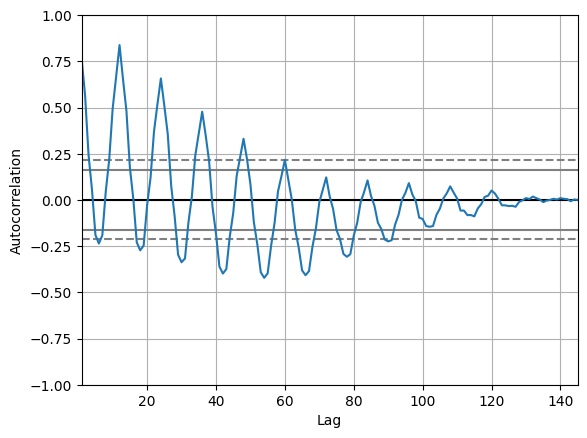

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampled_data)
plt.show()

In [28]:
### v√¨ ch√∫ng ta l·∫•y d·ªØ li·ªáu doanh thu theo th√°ng n√™n ch√∫ng ta l·∫•y ch·ªâ s·ªë lag l√† 30
### X√©t theo bi·ªÉu : 
### ACF: Gi√° tr·ªã ƒë·∫ßu ti√™n v∆∞·ª£t ra kh·ªèi kho·∫£ng tin c·∫≠y l√† lag = 1  ho·∫∑c lag = 2 => q = 1 ho·∫∑c q = 2, t·∫°i c√°c lag 12,24. 36 n√™n P c√≥ th·ªÉ l√† 1 ho·∫∑c 2
### PACF: Gi√° tr·ªã ƒë·∫ßu ti√™n v∆∞·ª£t ra kh·ªèi kho·∫£ng tin c·∫≠y l√† lag = 1 ho·∫∑c lag = 2 => p = 2 ho·∫∑c p = 3, t·∫°i c√°c lag 12,24 n√™n Q c√≥ th·ªÉ l√† 1 ho·∫∑c 2


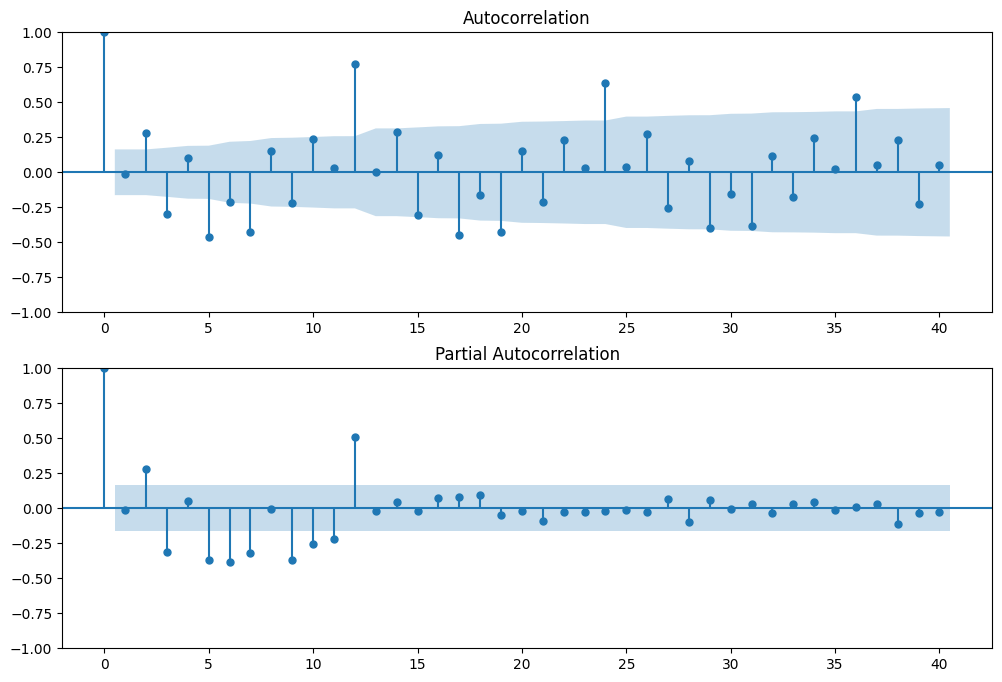

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stationary_data,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stationary_data,lags=40,ax=ax2)

In [30]:
## Ch·∫°y m√¥ h√¨nh d·ª± ƒëo√°n Arima

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


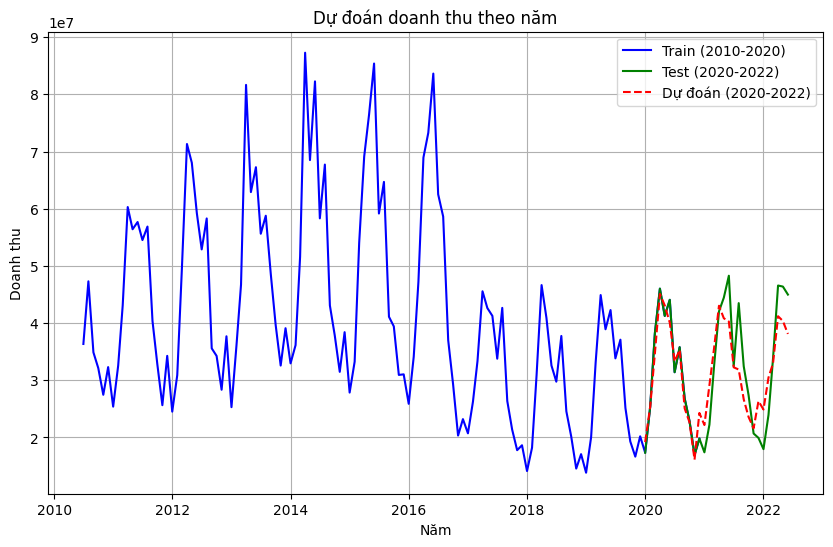

In [ ]:
# p = 1 ho·∫∑c 2. q = 2 ho·∫∑c 3
from statsmodels.tsa.arima.model import ARIMA 

SaleFact['year_month'] = SaleFact['Date'].dt.to_period('M')
SaleFact_yearly = SaleFact.groupby('year_month')['Revenue'].sum()

# Chuy·ªÉn ƒë·ªïi ch·ªâ m·ª•c th√†nh ki·ªÉu datetime ƒë·ªÉ c√≥ th·ªÉ c·∫Øt l√°t theo nƒÉm
SaleFact_yearly.index = SaleFact_yearly.index.to_timestamp()

# Chia t·∫≠p train (2012-2020) v√† t·∫≠p test (2020-2022)
train = SaleFact_yearly.loc['2010-01-01':'2020-12-31']
test = SaleFact_yearly.loc['2020-01-01':'2022-06-30'] # th√°ng 7 c√≥ ch·ªâ s·ªë Revenue kh√¥ng ƒë·∫ßy ƒë·ªß

# X√¢y d·ª±ng m√¥ h√¨nh ARIMA tr√™n t·∫≠p train
model = ARIMA(train, order=(1, diff_used, 2))
model_fit = model.fit()

# D·ª± ƒëo√°n tr√™n t·∫≠p test
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train (2010-2020)', color='blue')
plt.plot(test.index, test, label='Test (2020-2022)', color='green')
plt.plot(test.index, forecast, label='D·ª± ƒëo√°n (2020-2022)', color='red', linestyle='--')
plt.title('D·ª± ƒëo√°n doanh thu theo nƒÉm')
plt.xlabel('NƒÉm')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Ch·∫°y m√¥ h√¨nh SArimaArima

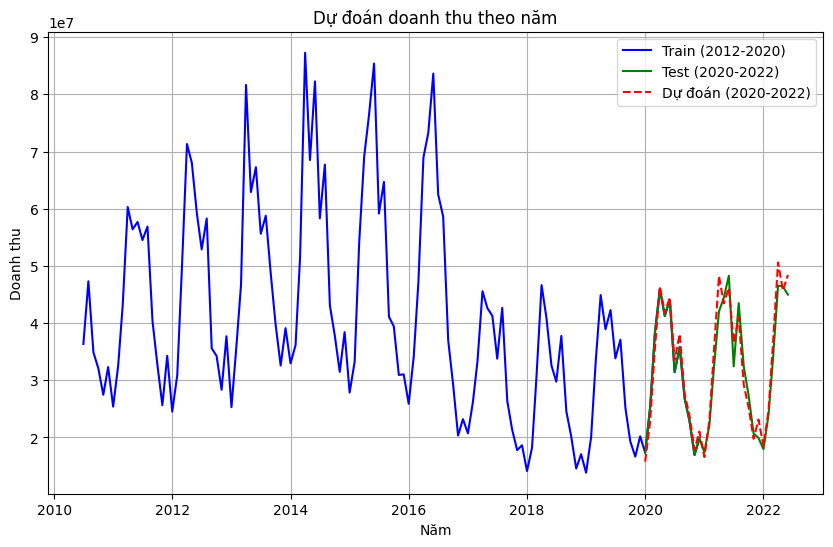

In [33]:
#P =1 ho·∫∑c 2. Q = 1 ho·∫∑c 2
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, diff_used, 3),seasonal_order=(1,diff_used,2,12))
results=model1.fit()
forecast_steps1 = len(test)
forecast1 = results.forecast(steps=forecast_steps1)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train (2012-2020)', color='blue')
plt.plot(test.index, test, label='Test (2020-2022)', color='green')
plt.plot(test.index, forecast1, label='D·ª± ƒëo√°n (2020-2022)', color='red', linestyle='--')
plt.title('D·ª± ƒëo√°n doanh thu theo nƒÉm')
plt.xlabel('NƒÉm')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# from pmdarima import auto_arima

# stepwise_model = auto_arima(train, seasonal=False, m=12, trace=True,
#                             error_action='ignore', suppress_warnings=True)
# print(stepwise_model.summary())

In [35]:
#Ki·ªÉm tra m√¥ h√¨nh

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# T√≠nh R-Squared (R¬≤)
r2 = r2_score(test, forecast)
print(f" R-Squared (R¬≤): {r2:.4f}")

# T√≠nh Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# T√≠nh Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f" RMSE: {rmse:.4f}")

 R-Squared (R¬≤): 0.8047
MAPE: 13.58%
 RMSE: 4660084.3246


In [37]:
r2 = r2_score(test, forecast1)
print(f" R-Squared (R¬≤): {r2:.4f}")

# T√≠nh Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast1) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# T√≠nh Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast1))
print(f" RMSE: {rmse:.4f}")

 R-Squared (R¬≤): 0.9491
MAPE: 7.64%
 RMSE: 2378114.8259


In [38]:
# from statsmodels.tsa.api import VAR 
# model bgh iobphiy ;hk/ 